In [5]:
import pandas as pd
# massaa => https://en.wikipedia.org/w/index.php?title=Proteinogenic_amino_acid&section=2
aamm = pd.read_table('massaa')
aamm.dtypes

Amino Acid          object
Short               object
Abbrev.             object
Formula             object
Mon. Mass§ (Da)    float64
Avg. Mass (Da)     float64
dtype: object

In [4]:
!pwd

/mnt/promec-data/notebooks


In [6]:
aamm['Mon. Mass§ (Da)']

0      71.03711
1     156.10111
2     114.04293
3     115.02694
4     103.00919
5     129.04259
6     128.05858
7      57.02146
8     137.05891
9     113.08406
10    113.08406
11    128.09496
12    131.04049
13    147.06841
14     97.05276
15    237.14773
16    150.95364
17     87.03203
18    101.04768
19    186.07931
20    163.06333
21     99.06841
Name: Mon. Mass§ (Da), dtype: float64

['F', 'Y', 'D', 'K', 'M', 'Q', 'N', 'A', 'E', 'S', 'G', 'R'] [148.07569, 311.13902, 426.16596, 554.26092, 685.30141, 813.35999, 927.40292, 998.44003, 1127.48262, 1214.51465, 1271.53611, 1427.63722] [1445.64778, 1298.57937, 1135.51604, 1020.4891000000001, 892.39414, 761.3536500000001, 633.29507, 519.25214, 448.21502999999996, 319.17244, 232.14041, 175.11895] [1444.6405]


([<matplotlib.axis.XTick at 0x7f304c7a30b8>,
 <a list of 12 Text xticklabel objects>)

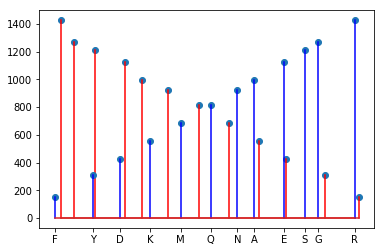

In [17]:
mmH2O = 18.01056
mmProton = 1.00728
pep = 'FYDKMQNAESGR'
# http://www.ionsource.com/tutorial/DeNovo/b_and_y.htm
# pep='MIGQK'
tMass = 0.0
bIon = 0.0
bIon_list = []
yIon_list = []
pep_list = []
for b in range(0, len(pep)):
    pep_list.append(pep[b])
    tMass = tMass + aamm[aamm['Short'] == pep[b]]['Mon. Mass§ (Da)'].values
    bIon = bIon + aamm[aamm['Short'] == pep[b]]['Mon. Mass§ (Da)'].values[0]
    bIon_list.append(bIon + mmProton)
    yIon = 0.0
    for y in range(b, len(pep)):
        yIon = yIon + aamm[aamm['Short'] ==
                           pep[y]]['Mon. Mass§ (Da)'].values[0]
    yIon_list.append(yIon + mmH2O + mmProton)
print(pep_list, bIon_list, yIon_list, tMass + mmH2O)
import matplotlib.pyplot as plt
plt.stem(yIon_list, bIon_list, 'r')
plt.stem(bIon_list, bIon_list, 'b')
plt.xticks(bIon_list, pep_list)

In [14]:
a=[102.055847167969,6401.5810546875
,103.054832458496,9917.642578125
,110.072082519531,15026.8984375
,120.071495056152,10929.8359375
,120.081275939941,182064.703125
,121.084999084473,7612.1591796875
,129.102828979492,55666.9375
,136.076141357422,75414.5703125
,145.858703613281,4534.66845703125
,158.093307495117,6715.48388671875
,175.120056152344,11089.0634765625
,196.128494262695,5295.76806640625
,209.093826293945,5926.2919921875
,210.266464233398,4686.41943359375
,212.027618408203,4422.75341796875
,214.589080810547,43879.70703125
,226.118591308594,8822.7578125
,244.130996704102,7389.9482421875
,247.27165222168,4674.541015625
,283.144348144531,27818.353515625
,319.172821044922,16296.9326171875
,448.21728515625,15920.0400390625
,487.258697509766,5932.37353515625
,519.250610351563,16296.27734375
,587.076110839844,4871.6162109375
,616.260925292969,5666.94482421875
,633.292846679688,6278.72607421875
,761.34765625,7676.69921875
,844.3916015625,11141.0537109375
,1119.38037109375,5091.85205078125]

In [4]:
!pwd

/mnt/promec-data/notebooks


In [10]:
a[0:10:2]

[102.055847167969,
 103.054832458496,
 110.072082519531,
 120.071495056152,
 120.081275939941]

In [3]:
%%bash
cat $HOME/PD/HF/Siri/combined/txt/evidence.txt | awk -F '\t' '{print $4}' | sort | uniq -c | tail 

      3 _YLVPQAR_
      6 _YRPGTVALR_
      4 _YRVPDVLVADPPIAR_
      6 _YSEFFTGSK_
      4 _YSGTLNLDRVTR_
      9 _YSLDPENPTK_
      1 _YVECSALTQK_
      5 _YVGESEANIR_
      5 _YVSSLTEEISK_
      3 _YYPTEDVPR_


In [15]:
chg = !awk -F '\t' '{print $15}' $HOME/PD/HF/Siri/combined/txt/evidence.txt 
chg.sort

<bound method SList.sort of ['Missed cleavages', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '2', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '

In [16]:
#https://colab.research.google.com/github/animesh/DeepCollisionalCrossSection/blob/master/process_data_final.ipynb#scrollTo=kMrHXX61ISRz
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import re, os, csv
import pickle
data_path = '/home/ash022/PD/HF/Siri/combined/txt/evidence.txt'
outpath = './data_proc'

In [20]:
df=pd.read_table(data_path)
df.head()

,Sequence,Length,Modifications,Modified sequence,Deamidation (NQ) Probabilities,Oxidation (M) Probabilities,Phospho (STY) Probabilities,Deamidation (NQ) Score Diffs,Oxidation (M) Score Diffs,Phospho (STY) Score Diffs,...,Potential contaminant,id,Protein group IDs,Peptide ID,Mod. peptide ID,MS/MS IDs,Best MS/MS,Deamidation (NQ) site IDs,Oxidation (M) site IDs,Phospho (STY) site IDs
0,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,461,0,0,0;1,0.0,NaN,NaN,NaN
1,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,461,0,0,2,2.0,NaN,NaN,NaN
2,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,461,0,0,3,3.0,NaN,NaN,NaN
3,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,461,0,0,4,4.0,NaN,NaN,NaN
4,AAAAAAAAAAGAAGGR,16,Acetyl (Protein N-term),_(ac)AAAAAAAAAAGAAGGR_,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4,461,0,0,5,5.0,NaN,NaN,NaN


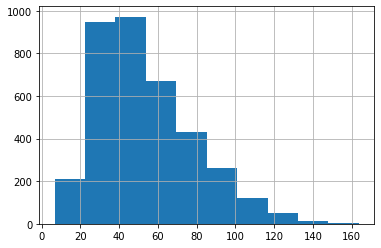

In [21]:
df["Score"].hist()

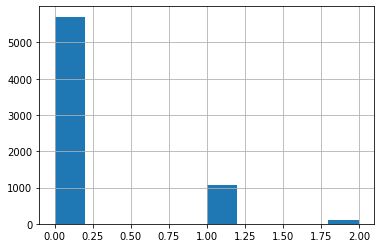

In [22]:
df["Missed cleavages"].hist()

In [23]:
df = df.rename(index=str, columns={"Modified sequence": "Modified_sequence"})
df['Modified_sequence'] = df['Modified_sequence'].str.replace('_','')
df['Modified_sequence']

0       (ac)AAAAAAAAAAGAAGGR
1       (ac)AAAAAAAAAAGAAGGR
2       (ac)AAAAAAAAAAGAAGGR
3       (ac)AAAAAAAAAAGAAGGR
4       (ac)AAAAAAAAAAGAAGGR
                ...         
6876             YVSSLTEEISK
6877             YVSSLTEEISK
6878               YYPTEDVPR
6879               YYPTEDVPR
6880               YYPTEDVPR
Name: Modified_sequence, Length: 6881, dtype: object

In [24]:
 print(df.shape)

(6881, 69)


nan nan


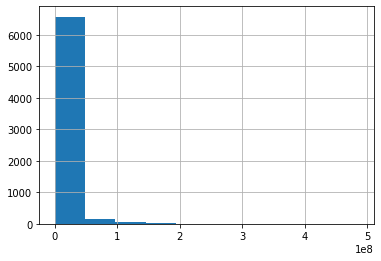

In [31]:
df['Intensity'].hist()
low = np.percentile(df['Intensity'], 10)
high = np.percentile(df['Intensity'], 90)
print(low, high)

In [34]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
data=df
dat = data['Modified_sequence']
dat = [list(d) for d in dat]    
#process data into one hot encoding
flat_list = ['_'] + [item for sublist in dat for item in sublist]
# define example
values = np.array(flat_list)
label_encoder = LabelEncoder()
label_encoder.fit(values)
print(values,label_encoder.classes_, len(label_encoder.classes_),label_encoder.transform([['_']]))

['_' '(' 'a' ... 'V' 'P' 'R'] ['(' ')' 'A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S'
 'T' 'V' 'W' 'Y' '_' 'a' 'c' 'd' 'e' 'h' 'o' 'p' 'x'] 31 [22]


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1]:
#https://www.kaggle.com/ayuraj/experiment-tracking-with-weights-and-biases#%F0%9F%92%BE-4.-Create-a-W&B-Artifact
!pip install --upgrade -q wandb
import wandb
wandb.login()

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /home/ash022/.netrc


True

In [ ]:
def seed_everything():
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1' 
    np.random.seed(hash("improves reproducibility") % 2**32 - 1)
    tf.random.set_seed(hash("by removing stochasticity") % 2**32 - 1)
seed_everything()

In [ ]:
# Initialize a run
run = wandb.init(project='plant-pathology', 
                 config=CONFIG,
                 group='EfficientNet', 
                 job_type='evaluate') # Note the job_type

# Update `wandb.config`
wandb.config.type = 'baseline'
wandb.config.kaggle_competition = 'Plant Pathology 2021 - FGVC8'

# Evaluate model
loss, auc, f1_score = model.evaluate(validloader)

# Log scores using wandb.log()
wandb.log({'val_AUC': auc, 
           'val_F1_score': f1_score})

# Finish the run
run.finish()

In [ ]:
# Save model
model.save('efficientnetb0-baseline.h5')

# Initialize a new W&B run
run = wandb.init(project='plant-pathology', 
                 config=CONFIG,
                 group='EfficientNet', 
                 job_type='save') # Note the job_type

# Update `wandb.config`
wandb.config.type = 'baseline'
wandb.config.kaggle_competition = 'Plant Pathology 2021 - FGVC8'

# Save model as Model Artifact
artifact = wandb.Artifact(name='efficientnet-b0', type='model')
artifact.add_file('efficientnetb0-baseline.h5')
run.log_artifact(artifact)

# Finish W&B run
run.finish()